In [1]:
# Simulating Lecture 3 MATLAB code in Python, using the respective libraries.
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io import wavfile

In [2]:
# Signal definition
x = np.cos(np.pi / 2)

In [3]:
# Definition of Nyquist frequency (sampling rate) and duration of the signal
fs = 44100  # Hz
duration = 3  # seconds
N = duration * fs  # number of samples

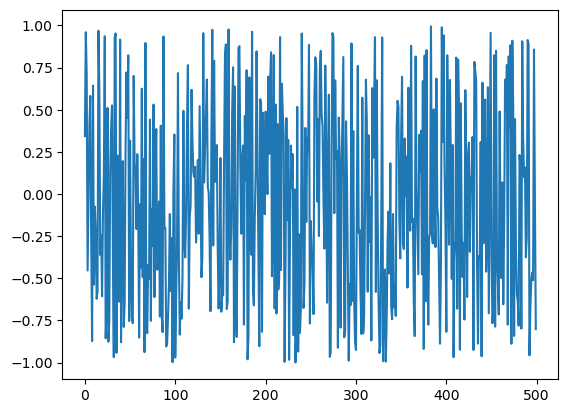

In [4]:
# Random noise signal
r = -5 + (5 + 5) * np.random.rand(N) 
r = r / r.max()  # normalization
plt.plot(r[:500])

In [5]:
# Sound the noise signal (wouldn't recommend using headphones for this one, it's quite loud!)
sd.play(r, fs)

In [6]:
# Saving noise signal to a .wav file (file won't open in Windows Media Player, but will in VLC, because of the codec)
wavfile.write('Sound files/noise.wav', rate=fs, data=r)

In [7]:
# Processing sinusoidal signal
fs = 44100  # Hz
Ts = 1 / fs  # sampling period
duration = 1  # seconds
N = duration * fs  # number of samples
t = np.arange(0, duration, Ts)  # time vector

f1 = 1000  # Hz
omega1 = 2 * np.pi * f1  # angular frequency
phi = 2 * np.pi * np.random.rand()  # random phase

x1 = np.cos(omega1 * t + phi)  # sinusoidal signal

# We don't have to convert the signal to 16-bit PCM between -32768 and 32767, 
# but it's necessary to replay it once it's saved to a .wav file, 
# because Media Player doesn't accept float values.
sine_wave_16bit = np.int16(x1 * 32767)

# Sound the sinusoidal signal
sd.play(sine_wave_16bit, fs)

# Saving quantized sinusoidal signal to a .wav file
wavfile.write('Sound files/sinusoidal.wav', rate = fs, data = sine_wave_16bit)

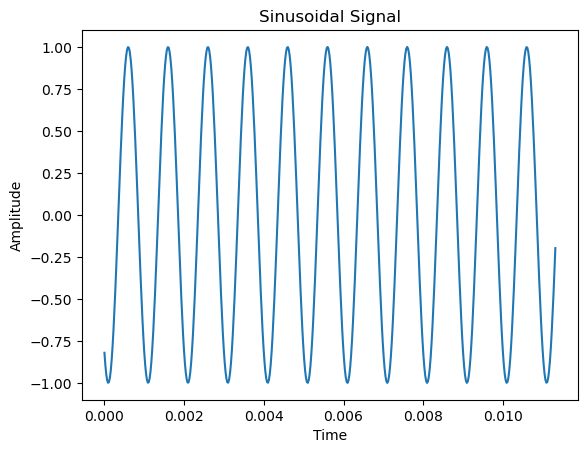

In [8]:
# Plotting the sinusoidal signal
plt.figure()
plt.plot(t[:500], x1[:500])   # Change the range to plot the whole signal (or a part of it)
plt.title('Sinusoidal Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

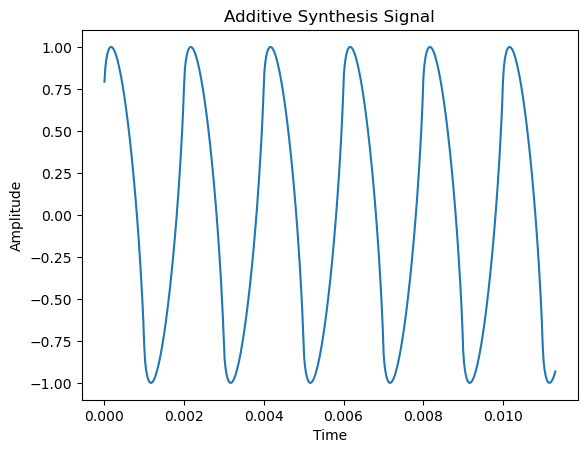

In [9]:
# Additive synthesis example
fs = 44100  # Hz
Ts = 1 / fs  # sampling period
duration = 2 # seconds
N = 7  # actual number of samples would've been duration * fs, but it's too big, so we compromise
t = np.arange(0, duration, Ts)  # time vector

f = 500 # Hz (fundamental frequency)
omega = 2 * np.pi * f  # angular frequency
phi = -2 * np.pi * np.random.rand()  # random phase

x = 0
for n in range(1, 2**N, 2):  # number of odd harmonics
    x += np.cos(n * omega * t + phi) / n**2 # additive synthesis of the odd harmonics
    # x += np.cos(n * omega * t + phi) / n # additive synthesis of the even harmonics
    # x += np.cos(n * omega * t + phi) # additive synthesis
    
    
# Normalize the signal
x = x / x.max()

# Sound the additive synthesis signal
sd.play(x, fs)

# Quantize the signal
sine_wave_16bit = np.int16(x * 32767)

# Saving the quantized signal to a .wav file
wavfile.write('Sound files/additive_synthesis.wav', rate = fs, data = sine_wave_16bit)

# Plotting the additive synthesis signal
plt.figure()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Additive Synthesis Signal')
plt.plot(t[:500], x[:500])  # Change the range to plot the whole signal (or a part of it)
plt.show()

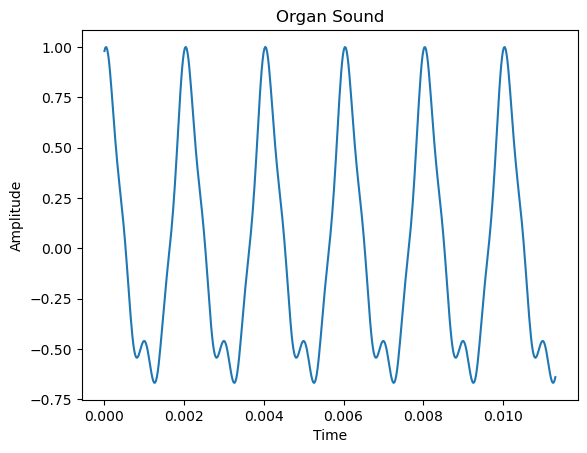

In [10]:
# Additive synthesis example of an organ sound
fs = 44100  # Hz
Ts = 1 / fs  # sampling period
duration = 2 # seconds
N = 7  # actual number of samples would've been duration * fs, but it's too big, so we compromise
t = np.arange(0, duration, Ts)  # time vector

f0 = 250 # Hz (fundamental frequency)
f = f0 * 2**(np.arange(0, 4))  # harmonic frequencies
phi = -2 * np.pi * np.random.rand()  # random phase

x = 0
for i in range(1, len(f)):  # number of harmonics
    x += np.cos(f[i] * 2 * np.pi * t + phi) / i**2  # additive synthesis of the harmonics

# Normalize the signal
x = x / x.max()

# Sound the additive synthesis signal
sd.play(x, fs)

# Quantize the signal
sine_wave_16bit = np.int16(x * 32767)

# Saving the quantized signal to a .wav file
wavfile.write('Sound files/organ.wav', rate = fs, data = sine_wave_16bit)

# Plotting the additive synthesis signal
plt.figure()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Organ Sound')
plt.plot(t[:500], x[:500])  # Change the range to plot the whole signal (or a part of it)
plt.show()


Time signal shape: (88200,)
Frequency signal shape after FFT:  (88200,)


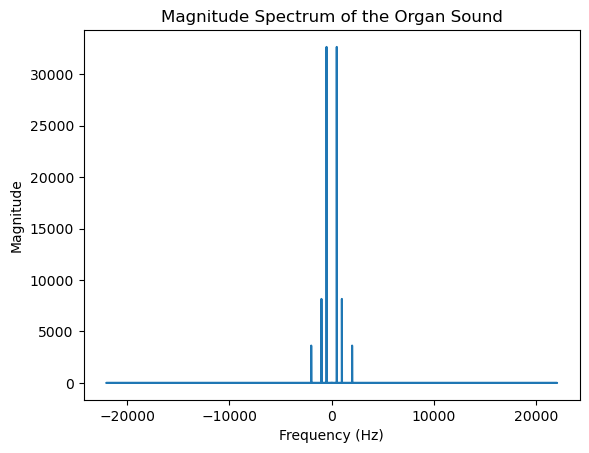

In [11]:
# Performing FFT on the additive synthesis signal
X = np.fft.fft(x)  # Fourier transform
# X = np.fft.fftshift(X)  # shift zero frequency component to the center
# X = np.abs(X)  # magnitude spectrum

# Confirmed signal shapes
print('Time signal shape:', x.shape)
print('Frequency signal shape after FFT: ', X.shape)

freqs = np.fft.fftfreq(len(X), Ts)  # frequency vector

plt.figure()
plt.plot(freqs, np.abs(X))  # magnitude spectrum of all frequencies
# plt.plot(freqs[:len(freqs)//2], np.abs(X[:len(X)//2]))  # magnitude spectrum of positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of the Organ Sound')
plt.show()

In [12]:
# Attempting to reproduce the signal using the inverse Fourier transform
x_reconstructed = np.fft.ifft(X)  # inverse Fourier transform

# Sound the reconstructed signal
sd.play(x_reconstructed.real, fs)

# Quantize the signal using 16-bit PCM between
sine_wave_16bit = np.int16(x_reconstructed.real * 32767)

# Saving the quantized signal to a .wav file
wavfile.write('Sound files/organ_reconstructed.wav', rate = fs, data = sine_wave_16bit)

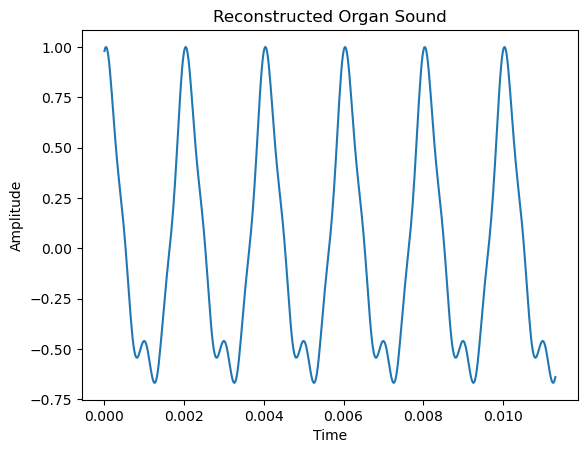

In [13]:
# Plotting the reconstructed signal (it's the same as the original signal)
plt.figure()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Reconstructed Organ Sound')
plt.plot(t[:500], x_reconstructed.real[:500])  # Change the range to plot the whole signal (or a part of it)
plt.show()